In [4]:
%matplotlib inline
#%matplotlib notebook
from universal import *
from astra_modules import *
from FELs import *

In [5]:
def plot_config():
    from cycler import cycler
    from matplotlib.ticker import AutoMinorLocator

    fsize = 14 # a quarter of the paper width: 20 pt; half of the paper width: 12
    font = {'size' : fsize, 'family' : 'serif'}
    color_cycle = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    linestyle_cycle = ['-', '--', '-.', ':', (0, (5, 2, 5, 2)), (0, (10, 2, 5, 2, 2, 2)), (0, (12, 2, 2, 2))]
    marker_cycle = ['o', 'd', 'v', '^', '<', '>', '*']
    
    mpl.rc('font', **font)
    mpl.rc('xtick', labelsize = 10, direction = 'in', top   = True)
    mpl.rc('ytick', labelsize = 10, direction = 'in', right = True)
    mpl.rc('xtick.major', size = 5, width = 1)
    mpl.rc('ytick.major', size = 5, width = 1)
    mpl.rc('xtick.minor', size = 3, width = 0.7, visible = True)
    mpl.rc('ytick.minor', size = 3, width = 0.7, visible = True)
    
    mpl.rc('lines', linewidth=2, markersize=6, color='r')
    # mpl.rc('lines', linestyle = 'solid')
    mpl.rc('axes', labelpad = 0, prop_cycle=(cycler('color', color_cycle) + cycler('linestyle', linestyle_cycle) + cycler('marker', marker_cycle)))
    mpl.rc('legend', fontsize = 12, labelspacing = 0.05, handletextpad=0.4, frameon=False, handlelength=2.1)
    
    mpl.rc('figure', dpi = 100, figsize = (4, 4))
    mpl.rc('figure.subplot', bottom = 0.15, top = 0.9, left = 0.15, right = 0.9)
    
    return
plot_config()

rootdir = r'\\afs\ifh.de\group\pitz\data\lixiangk\work'
syncdir = r'\\afs\ifh.de\group\pitz\data\lixiangk\work\sync'

In [2]:
rho=pierce_parameter(40,16.67,1.5e-3,3.8e-2,0.4)
LG0=gain_length(rho,3.8e-2)

print rho,LG0,np.log(9000)

0.00916007608193 0.190596106396 9.10497985632


## 超辐射THz-FEL模拟计算

In [6]:
workdir='C:\\Users\\LiXK\\Desktop\\SR'
os.chdir(workdir)

Nu,lam_u,B=42,3.8e-2,0.35
lam_s=270e-6
K=undulator_parameter(B,lam_u); #print K

Q=90e-12
sigma_t=100e-15
sigma_z=sigma_t*g_c; print sigma_z
curpeak=Q/sigma_t/2.355; print curpeak

Ek=7.2 # MeV
gamma=Ek/g_mec2+1; #print gamma
delgam=gamma*0.5e-2

lam_s=270e-6
#lam_s=resonant_wavelength(K,lam_u,gamma); print lam_s
freq_s=g_c/lam_s

gamma=resonant_energy(K,lam_u,lam_s)
delgam=gamma*0.5e-2
print gamma,g_mec2*(gamma-1),delgam*g_mec2*1e3,K/np.sqrt(2)

nslice=Nu+10
ntail=-10

WindowsError: [Error 3] The system cannot find the path specified: 'C:\\Users\\LiXK\\Desktop\\SR'

In [22]:
gen=genesis()
gen.set_key('undulator','aw0',K/np.sqrt(2))
gen.set_key('undulator','awd',K/np.sqrt(2))
gen.set_key('undulator','nwig',Nu)
gen.set_key('undulator','xlamd',lam_u)

gen.set_key('electron','gamma0',gamma)
gen.set_key('electron','delgam',delgam)
gen.set_key('electron','curpeak',curpeak)
gen.set_key('electron','bunch',0.2066)

gen.set_key('time','nslice',nslice)
gen.set_key('time','ntail',ntail)
gen.set_key('time','iotail',1)
gen.set_key('time','curlen',sigma_z)
gen.set_key('time','itdp',1)

gen.set_key('io','ffspec',1)
gen.set_key('io','ippart',5)
gen.set_key('io','ipradi',10)

gen.set_key('radiation','xlamds',lam_s)
gen.set_key('control','zstop',Nu*lam_u)

gen.output()

In [146]:
gen_split('template.out','slices')

In [186]:
data=gen_sum(0,'slices2')
power=np.array(data)
np.savetxt('power.txt',power,fmt='%12.4E')
data=gen_sum(2,'slices2')
amp=np.array(data)
np.savetxt('amp.txt',amp,fmt='%12.4E')
data=gen_sum(3,'slices2')
phase=np.array(data)
np.savetxt('phase.txt',phase,fmt='%12.4E')

### 脉冲功率分布

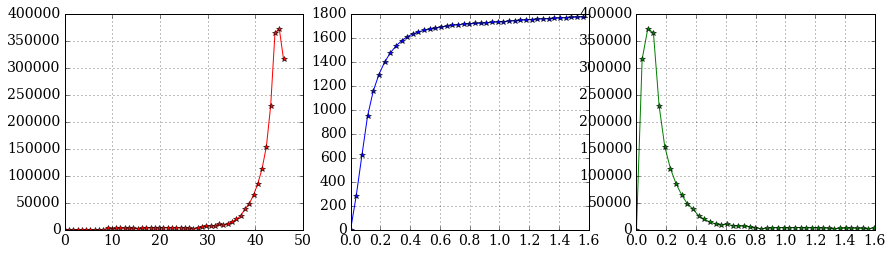

In [148]:
power=np.loadtxt('power.txt')
amp=np.loadtxt('amp.txt')
phase=np.loadtxt('phase.txt')

#lam_s=8.44e-7
col=-1
Nu,nslice=42,len(power[:,col])
period_s=lam_s/g_c
time=np.arange(nslice)*period_s*1e12 # ps
pos=np.arange(Nu+1)*lam_u

fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].plot(time,power[:,col],'r*-')
axes[1].plot(pos[:col],power[:,:col].sum(axis=0)*period_s*1e9,'b*-') # energy: nJ
axes[2].plot(pos,power[10,:],'g*-') # power: W
axes[0].grid()
axes[1].grid()
axes[2].grid()

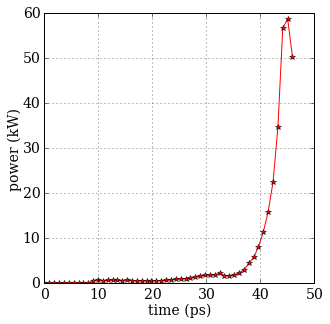

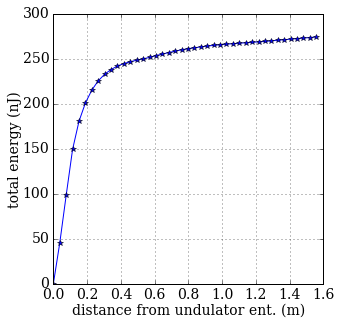

In [187]:
fig,ax=plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(time,power[:,col]/1e3,'r*-')
ax.set_xlabel(r'time (ps)')
ax.set_ylabel(r'power (kW)')
ax.grid()
fig.savefig('power-time.eps')

fig,ax=plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(pos[:col],power[:,:col].sum(axis=0)*period_s*1e9,'b*-') # energy: nJ
ax.set_xlabel(r'distance from undulator ent. (m)')
ax.set_ylabel(r'total energy (nJ)')
ax.grid()
fig.savefig('energy-pos.eps')

### 频谱分析

In [188]:
amp=np.loadtxt('amp.txt')
phase=np.loadtxt('phase.txt')

spectrum=gen2spectrum(phase,amp)
np.savetxt('spectrum.dat',spectrum,fmt='%12.4E')

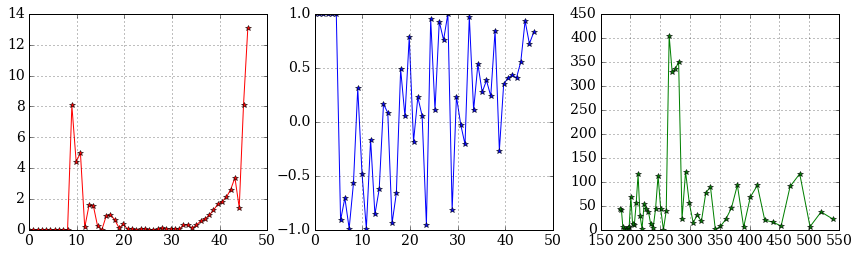

In [151]:
N=nslice
col=-1
n=np.arange(N)*period_s*1e12
a1=amp[:,col]
p1=np.cos(phase[:,col])

#fout=(dindgen(nslice)/(nslice-1.)-0.5)/delt+1.e0/xlamds
#data_profile[2,*]=1/fout*1e9

X=spectrum[:,col]
F=1.0*np.arange(-N/2,N/2,)/N/lam_s+1./lam_s
F=1./F*1e6

fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].plot(n,a1,'r*-')
axes[1].plot(n,p1,'b*-')
axes[2].plot(F,X,'g*-')
#axes[2].axis([800,900,0,4.2e9])
axes[0].grid()
axes[1].grid()
axes[2].grid()

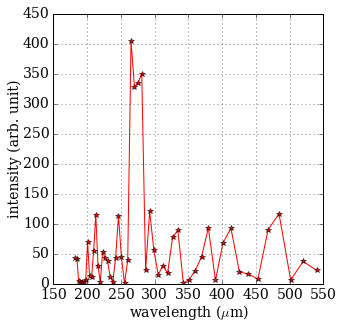

In [189]:
fig,ax=plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(F,X,'r*-') # energy: nJ
ax.set_xlabel(r'wavelength ($\mu$m)')
ax.set_ylabel(r'intensity (arb. unit)')
ax.grid()
fig.savefig('spectrum.eps')

### 获得电子束的切片分布

In [152]:
workdir='C:\\Users\\LiXK\\Desktop\\SR'
os.chdir(workdir)

In [153]:
a=np.fromfile('template.out.par')
os.mkdir('par')

In [154]:
nslice,nwig,ippart,ispart=52,42,5,1
nstep=nwig/ippart+1

for i in np.arange(10,13):
    for j in np.arange(nstep):
        k=i*nstep+j
        r=a[8192*6*k:8192*6*(k+1)].reshape(6,8192).T
        f=str.format('par/slice_%03d_step_%03d.dat' % (i*ispart+1,j*ippart))
        np.savetxt(f,r,fmt='%12.4E')

In [263]:
k_k=2*np.pi*(1./lam_s/1e-2+1./lam_u/1e-2)
print lam_s*1e-2/g_c*1e15,k_k

500.346142797 42053.2490296


In [174]:
a=np.loadtxt('par/slice_011_step_000.dat')
Ek=np.mean(a[:,0])
x=np.std(a[:,2])
xp=np.std(a[:,4])
xpx=np.mean(a[:,2]*a[:,4])
eps=np.sqrt(x**2*xp**2-xpx**2)
print Ek, eps, np.std(a[:,1])/360*period_s*1e15*0.038

11.1640019531 6.00000077597e-06 474.399189032


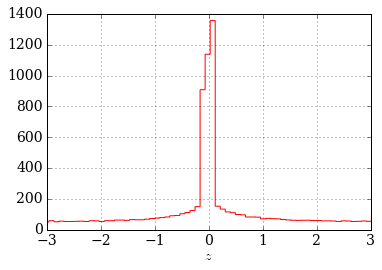

In [181]:
for i in np.arange(1):
    step=i*10
    filename=str.format('par/slice_011_step_%03d.dat' % step)
    label1=str.format('step %03d' % step)
    a=np.loadtxt(filename)
    #hist,bins=np.histogram(a[:,1],100)
    #plt.plot(bins[1:],hist,'-')
    plt.hist(a[:,1],100,histtype='step', label=label1)
plt.axis([-3,3,0,1400])
plt.xlabel(r'$z$')
#plt.legend(loc='upper left')
plt.grid()
plt.show()
plt.savefig('electron.eps')

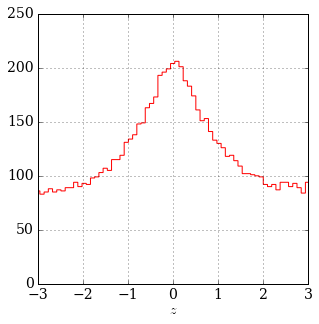

In [190]:
fig,ax=plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
for i in np.arange(1):
    step=i*10
    filename=str.format('par1/slice_011_step_%03d.dat' % step)
    label1=str.format('step %03d' % step)
    a=np.loadtxt(filename)
    #hist,bins=np.histogram(a[:,1],100)
    #plt.plot(bins[1:],hist,'-')
    ax.hist(a[:,1],100,histtype='step', label=label1)
# for i in np.arange(1):
#     step=i*10
#     filename=str.format('par1/slice_011_step_%03d.dat' % step)
#     label1=str.format('step %03d' % step)
#     a=np.loadtxt(filename)
#     #hist,bins=np.histogram(a[:,1],100)
#     #plt.plot(bins[1:],hist,'-')
#     plt.hist(a[:,1],100,histtype='step', label=label1)

ax.set_xlim(-3,3)
ax.set_xlabel(r'$z$')
#plt.legend(loc='upper left')
ax.grid()
fig.savefig('electron.eps')

## genesis.beam

genesis的默认方式无法产生超短电子束，故这里利用astra输出的电子束，编写后处理程序生成genesis要求的电子束格式

输入文件共六列，分别是X，PX，Y，PY，T，P，单位分别是: meter, mc, meter, mc, second, mc^2

其中，可以用Z代替T，用GAMMA代替P

In [212]:
charge=100e-12
size=8192*4
title='# Input Distribution for SR-UR\n? VERSION = 1.0\n? CHARGE = '+`charge`+'\n? SIZE = '+`size`+'\n? COLUMNS X PX Y PY T P'
print title

# Input Distribution for SR-UR
? VERSION = 1.0
? CHARGE = 1e-10
? SIZE = 32768
? COLUMNS X PX Y PY T P


In [213]:
def astra2gen(infile='astra.beam',outfile='gen.beam'):
    data=np.loadtxt(infile)
    data[1:,5]=data[1:,5]+data[0,5]
    #data[:,7]=np.sqrt(g_mec2**2*1e12+data[:,3]**2+data[:,4]**2+data[:,5]**2)/g_mec2/1e6
    data[:,5]=np.sqrt(data[:,3]**2+data[:,4]**2+data[:,5]**2)/g_mec2/1e6
    data[:,3]=data[:,3]/g_mec2/1e6
    data[:,4]=data[:,4]/g_mec2/1e6
    
    data[:,2]=data[:,1]
    data[:,1]=data[:,3]
    data[:,3]=data[:,4]
    data[:,4]=data[:,6]/1e9
    np.savetxt(outfile,data[:,0:6],fmt='%12.4E',header=title,comments='')
astra2gen('SR-UR.ini','SR-UR.beam')

In [226]:
a=np.loadtxt('SR-UR.beam',skiprows=5)
b=np.loadtxt('current.out')

x=np.std(a[:,2])
xp=np.std(a[:,3])
xpx=np.mean(a[:,2]*a[:,3])
print np.sqrt(x**2*xp**2-xpx**2)
print np.std(a[:,4])*1e12

2.00320684288e-06
0.997431844924


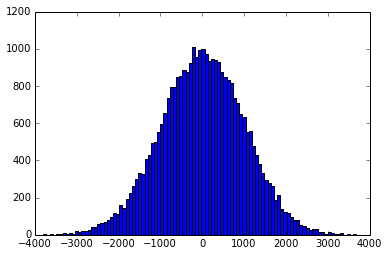

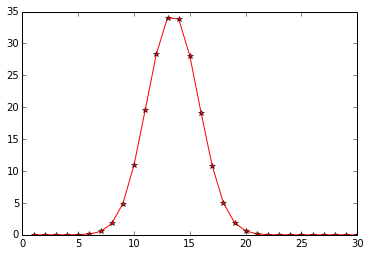

In [233]:
x=a[:,4]
xc=np.mean(x)
#x=x-xc

plt.hist(x*1e15,100)
plt.show()
plt.plot(b[:,0],b[:,1],'r*-')

In [135]:
Tb=1./1e12
omg_b=2.*np.pi/Tb
sig_M=Tb*10
sig_mu=Tb/6
def I_t(t):
    return np.exp(-t**2/2./sig_M**2)*np.cos(omg_b*t/2)**2
def I_t_2(t,m=10):
    a=0
    for i in np.arange(-m,m):
        a=a+np.exp(-(t-2.*i*np.pi/omg_b)**2/2./sig_mu**2)
    return a*np.exp(-t**2/2./sig_M**2)

def form_factor(lam_s=300e-6,sigma_t=100e-15):
    sigma_z=sigma_t*g_c
    return np.exp(-4*np.pi**2*sigma_z**2/lam_s**2)
form_factor(270e-6,100e-15)

0.61464295019281168

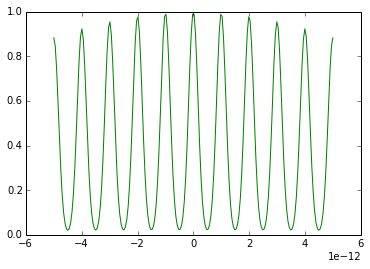

In [305]:
x=np.linspace(-5,5,200)*Tb
y=I_t(x)
y2=I_t_2(x,100)
#plt.plot(x,y,'r-')
plt.plot(x,y2,'g-')

# Seeded FEL

In [100]:
0.5e6*10e-12/(8e6*100e-12)*100

0.625

In [187]:
workdir='E:\\Lixiangkun\\Work\\Seeded-FEL\CAEP'
os.chdir(workdir)

lam_u=3.8e-2 # m
Nu=42
B=0.4 # T
K=undulator_parameter(B,lam_u)
#K=0.98*np.sqrt(2)
print K

Q=200e-12
sigma_t=2.5e-12/2.355
sigma_z=sigma_t*g_c
curpeak=Q/sigma_t/2.355
print curpeak

Ek=6 # MeV
gamma=Ek/0.511+1

lam_s=239e-6
print resonant_wavelength(K,lam_u,gamma)

#gamma=resonant_energy(lam_s,lam_u,K)
delgam=gamma*0.5e-2
print gamma,g_mec2*(gamma-1),lam_s

freq_s=g_c/lam_s

nslice=Nu+30
ntail=-30

1.41926807645
80.0
0.00023489956181
12.7416829746 5.99998741292 0.000239


In [188]:
gen=genesis()
gen.set_key('undulator','aw0',K/np.sqrt(2))
gen.set_key('undulator','awd',K/np.sqrt(2))
gen.set_key('undulator','nwig',Nu)
gen.set_key('undulator','xlamd',lam_u)

gen.set_key('electron','gamma0',gamma)
gen.set_key('electron','delgam',delgam)
gen.set_key('electron','rxbeam',1.5e-3/2.355)
gen.set_key('electron','rybeam',1e-3/2.355)
gen.set_key('electron','emitx',5e-6)
gen.set_key('electron','emity',5e-6)
gen.set_key('electron','curpeak',curpeak)
#gen.set_key('electron','bunch',0.2066)

gen.set_key('time','nslice',nslice)
gen.set_key('time','ntail',ntail)
gen.set_key('time','iotail',1)
gen.set_key('time','curlen',sigma_z)
gen.set_key('time','itdp',0)

gen.set_key('io','ffspec',10)
gen.set_key('io','ippart',0)
gen.set_key('io','ipradi',0)

gen.set_key('radiation','xlamds',lam_s)
gen.set_key('radiation','prad0',1000)
gen.set_key('radiation','zrayl',2)
gen.set_key('radiation','zwaist',Nu*lam_u/2)

gen.set_key('control','zstop',Nu*lam_u)

gen.output()

In [173]:
os.popen('start cmd /c {echo fel1.in | genesis1}')

<open file 'start cmd /c {echo fel1.in | genesis1}', mode 'r' at 0x0818CE38>

In [149]:
help(os.system)

Help on built-in function system in module nt:

system(...)
    system(command) -> exit_status
    
    Execute the command (a string) in a subshell.



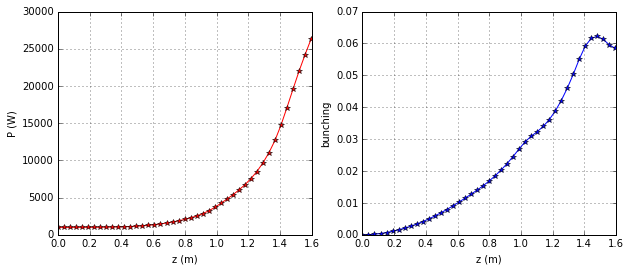

In [190]:
gen_split('template.out','./')

data=gen_sum(0,'slices')
power=np.array(data)
np.savetxt('power.txt',power,fmt='%12.4E')
data=gen_sum(2,'slices')
amp=np.array(data)
np.savetxt('amp.txt',amp,fmt='%12.4E')
data=gen_sum(3,'slices')
phase=np.array(data)
np.savetxt('phase.txt',phase,fmt='%12.4E')

data=np.loadtxt('slice_00001.txt',skiprows=6)

Nu,nslice=Nu,1
period_s=lam_s/g_c
pos=np.arange(Nu+1)*lam_u
power=data[:,0]
y=data[:,6]

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].plot(pos,power,'r-*')
axes[0].set_xlabel('z (m)')
axes[0].set_ylabel('P (W)')
axes[1].plot(pos,y,'b-*')
axes[1].set_xlabel('z (m)')
axes[1].set_ylabel('bunching')
axes[0].grid()
axes[1].grid()
fig.savefig('fel1.png')

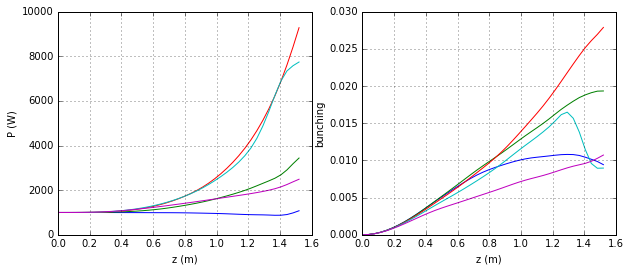

In [29]:
fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].set_xlabel('z (m)')
axes[0].set_ylabel('P (W)')
axes[1].set_xlabel('z (m)')
axes[1].set_ylabel('bunching')
lam=np.array([180,182,185,187,190])
for i in np.arange(len(lam)):
    fname=str.format('%dum.txt' % lam[i])
    data=np.loadtxt(fname,skiprows=6)

    Nu,nslice=Nu,1
    period_s=lam_s/g_c
    pos=np.arange(Nu+1)*lam_u
    power=data[:,0]
    y=data[:,6]
    axes[0].plot(pos,power,'-')
    axes[1].plot(pos,y,'-')

axes[0].grid()
axes[1].grid()

(60, 121)


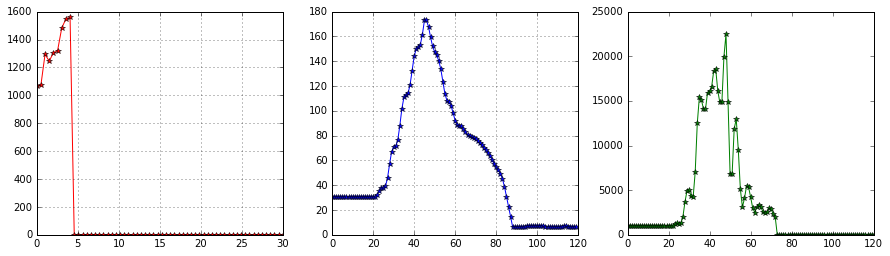

In [193]:
power=np.loadtxt('power.txt')
amp=np.loadtxt('amp.txt')
phase=np.loadtxt('phase.txt')

col=-1
nslice=60
#lam_s=8.44e-7
#Nu,nslice=100,len(power[:,col])
period_s=lam_s/g_c
time=np.arange(nslice)*period_s*1e12
pos=np.arange(Nu+1)#*lam_u
print power.shape

fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].plot(time,power[:,col],'r*-')
axes[1].plot(pos[:col],power[:,:col].sum(axis=0)*period_s*1e9,'b*-')
axes[2].plot(pos,power[10,:],'g*-')
axes[0].grid()
axes[1].grid()

In [293]:
amp=np.loadtxt('amp.txt')
phase=np.loadtxt('phase.txt')

spectrum=gen2spectrum(phase,amp)
np.savetxt('spectrum.dat',spectrum,fmt='%12.4E')

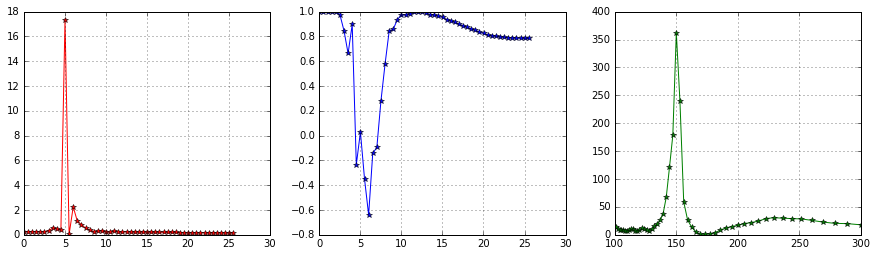

In [294]:
N=nslice
col=-1
n=np.arange(N)*period_s*1e12
a1=amp[:,col]
p1=np.cos(phase[:,col])

#fout=(dindgen(nslice)/(nslice-1.)-0.5)/delt+1.e0/xlamds
#data_profile[2,*]=1/fout*1e9

X=spectrum[:,col]
F=1.0*np.arange(-N/2,N/2,)/N/lam_s+1./lam_s
F=1./F*1e6

fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].plot(n,a1,'r*-')
axes[1].plot(n,p1,'b*-')
axes[2].plot(F,X,'g*-')
#axes[2].axis([800,900,0,4.2e9])
axes[0].grid()
axes[1].grid()
axes[2].grid()

## 京都大学seeded THz FEL参数模拟

In [239]:
workdir='E:\\Lixiangkun\\Work\\Seeded-FEL\\200mW'
os.chdir(workdir)

lam_u=20e-3 # m
Nu=125
B=2/1.868 # T
K=undulator_parameter(B,lam_u)
print K

Q=1000e-12
sigma_t=1000/288.*1e-12/2.355
sigma_z=sigma_t*g_c
curpeak=Q/sigma_t/2.355
print curpeak

Ek=6.25 # MeV
gamma=Ek/g_mec2+1
delgam=gamma*0.08e-2

lam_s=g_c/1.62e12 #150e-6
lam_s=resonant_wavelength(gamma,K,lam_u)
print lam_s,g_c/lam_s*1e-12
#gamma=resonant_energy(lam_s,lam_u,K)
#delgam=gamma*0.08e-2
print gamma,g_mec2*(gamma-1),delgam*g_mec2*1e3
freq_s=g_c/lam_s

nslice=Nu+20 # Nu+10
ntail=-15

##
gen=genesis()
gen.set_key('undulator','aw0',K/np.sqrt(2))
gen.set_key('undulator','awd',K/np.sqrt(2))
gen.set_key('undulator','nwig',Nu)
gen.set_key('undulator','xlamd',lam_u)

gen.set_key('electron','gamma0',gamma)
gen.set_key('electron','delgam',delgam)
gen.set_key('electron','curpeak',curpeak)
gen.set_key('electron','rxbeam',0.74e-3)
gen.set_key('electron','rybeam',0.72e-3)
gen.set_key('electron','emitx',1.77e-6)
gen.set_key('electron','emity',1.63e-6)
gen.set_key('electron','alphax',2.95)
gen.set_key('electron','alphay',1.95)
#gen.set_key('electron','bunch',0.2066)

gen.set_key('time','nslice',nslice)
gen.set_key('time','ntail',ntail)
gen.set_key('time','iotail',1)
gen.set_key('time','curlen',sigma_z)
gen.set_key('time','itdp',0)

gen.set_key('io','ffspec',10)
gen.set_key('io','ippart',10)
gen.set_key('io','ipradi',10)

gen.set_key('radiation','xlamds',lam_s)
gen.set_key('radiation','prad0',10)

gen.set_key('control','zstop',Nu*lam_u)

gen.output()

2.0
288.0
0.000171371855366 1.74936810574
13.2309454238 6.25 5.4087991424


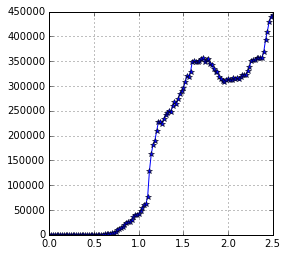

In [240]:
## 稳态
data=np.genfromtxt('template.out',skip_header=311)

Nu,nslice=Nu,1
period_s=lam_s/g_c
pos=np.arange(Nu+1)*lam_u
power=data[:,0]

fig,axes=plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.plot(pos,power,'b-*')
axes.grid()

In [219]:
## 时变
workdir='E:\\Lixiangkun\\Work\\Seeded-FEL\\200mW'
os.chdir(workdir)

gen_split('template.out','slices')

data=gen_sum(0,'slices')
power=np.array(data)
np.savetxt('power.txt',power,fmt='%12.4E')
data=gen_sum(2,'slices')
amp=np.array(data)
np.savetxt('amp.txt',amp,fmt='%12.4E')
data=gen_sum(3,'slices')
phase=np.array(data)
np.savetxt('phase.txt',phase,fmt='%12.4E')

IndexError: too many indices for array

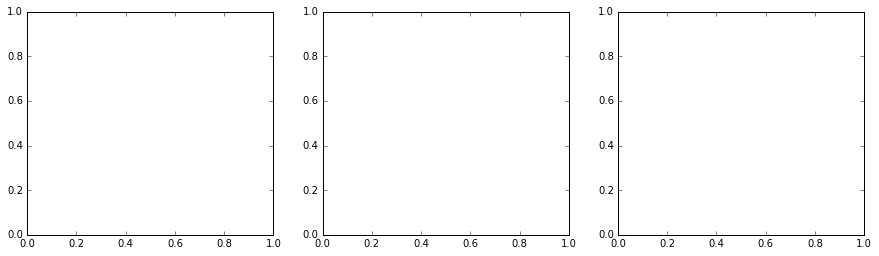

In [225]:
power=np.loadtxt('power.txt')
amp=np.loadtxt('amp.txt')
phase=np.loadtxt('phase.txt')

col=-1
#lam_u,lam_s=1.8e-2,8.44e-7
Nu,nslice=Nu,1
period_s=lam_s/g_c
time=np.arange(nslice)*period_s*1e12
pos=np.arange(Nu+1)*lam_u

print len(pos[:col]),len(power[:,:col].sum(axis=0))
#g_fit=lambda x,a,b,c,d:a*np.exp(-(x-c)**2/2.0/b**2)+d
#popt,pcov=curve_fit(g_fit,time,power[:,col],(5e5,3,45,0))
#print popt

fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].plot(time,power[:,col],'r*')
#axes[0].plot(time,g_fit(time,popt[0],popt[1],popt[2],popt[3]),'r-')
axes[1].plot(pos[:col],power[:,:col].sum(axis=0)*period_s*1e9,'b-*')
axes[2].plot(pos,power[10,:],'g*-')
axes[0].grid()
axes[1].grid()

In [176]:
amp=np.loadtxt('amp.txt')
phase=np.loadtxt('phase.txt')

spectrum=gen2spectrum(phase,amp)
np.savetxt('spectrum.dat',spectrum,fmt='%12.4E')

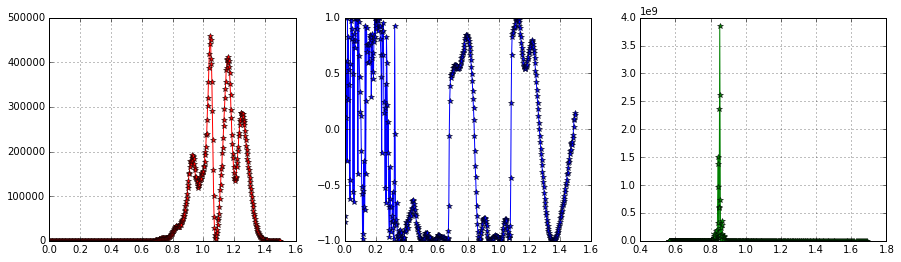

In [177]:
N=nslice
col=-1
n=np.arange(N)*period_s*1e12
a1=amp[:,col]
p1=np.cos(phase[:,col])

#fout=(dindgen(nslice)/(nslice-1.)-0.5)/delt+1.e0/xlamds
#data_profile[2,*]=1/fout*1e9

X=spectrum[:,col]
F=1.0*np.arange(-N/2,N/2,)/N/lam_s+1./lam_s
F=1./F*1e6

fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].plot(n,a1,'r*-')
axes[1].plot(n,p1,'b*-')
axes[2].plot(F,X,'g*-')
#axes[2].axis([800,900,0,4.2e9])
axes[0].grid()
axes[1].grid()
axes[2].grid()

## Neptune seeded FEL

In [305]:
workdir='E:\\Lixiangkun\\Work\\Seeded-FEL'
os.chdir(workdir)

lam_u=27e-3 # m
Nu=75
B=1.14 # T
K=undulator_parameter(B,lam_u)
print K

Q=1000e-12
sigma_t=3e-12/2.355
sigma_z=sigma_t*g_c
curpeak=Q/sigma_t/2.355
print curpeak

Ek=9 # MeV
gamma=Ek/g_mec2+1
delgam=gamma*0.08e-2

lam_s=200e-6
lam_s=resonant_wavelength(gamma,K,lam_u)
print lam_s,g_c/lam_s*1e-12

#gamma=resonant_energy(lam_s,lam_u,K)
#delgam=gamma*0.25e-2
print gamma,g_mec2*(gamma-1),delgam*g_mec2*1e3
freq_s=g_c/lam_s

nslice=Nu+30 # Nu+10
ntail=-30

##
gen=genesis()
gen.set_key('undulator','aw0',K/np.sqrt(2))
gen.set_key('undulator','awd',K/np.sqrt(2))
gen.set_key('undulator','nwig',Nu)
gen.set_key('undulator','xlamd',lam_u)

gen.set_key('electron','gamma0',gamma)
gen.set_key('electron','delgam',delgam)
gen.set_key('electron','curpeak',curpeak)
gen.set_key('electron','rxbeam',0.2e-3)
gen.set_key('electron','rybeam',0.2e-3)
gen.set_key('electron','emitx',2e-6)
gen.set_key('electron','emity',2e-6)
gen.set_key('electron','alphax',2.95)
gen.set_key('electron','alphay',1.95)
#gen.set_key('electron','bunch',0.2066)

gen.set_key('time','nslice',nslice)
gen.set_key('time','ntail',ntail)
gen.set_key('time','iotail',1)
gen.set_key('time','curlen',sigma_z)
gen.set_key('time','itdp',1)

gen.set_key('io','ffspec',10)
gen.set_key('io','ippart',10)
gen.set_key('io','ipradi',10)

gen.set_key('radiation','xlamds',lam_s)
gen.set_key('radiation','prad0',1e3)
#gen.set_key('radiation','zrayl',2)

gen.set_key('control','zstop',Nu*lam_u)

gen.output()

2.87401785481
333.333333333
0.000199911575425 1.49962530866
18.6125614103 9.0 7.6087991424


In [306]:
#workdir='C:\\Program Files (x86)\\genesis\\examples\\visa2'
#os.chdir(workdir)

gen_split('template.out','slices')

data=gen_sum(0,'slices')
power=np.array(data)
np.savetxt('power.txt',power,fmt='%12.4E')
data=gen_sum(2,'slices')
amp=np.array(data)
np.savetxt('amp.txt',amp,fmt='%12.4E')
data=gen_sum(3,'slices')
phase=np.array(data)
np.savetxt('phase.txt',phase,fmt='%12.4E')

75 75


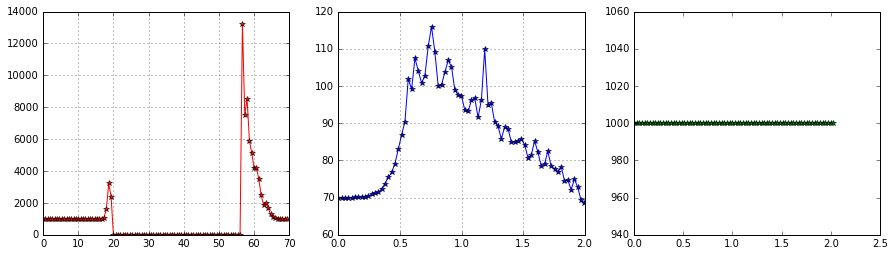

In [307]:
power=np.loadtxt('power.txt')
amp=np.loadtxt('amp.txt')
phase=np.loadtxt('phase.txt')

col=-1
#lam_u,lam_s,Nu,nslice=1.8e-2,8.44e-7,222,533
period_s=lam_s/g_c
time=np.arange(nslice)*period_s*1e12
pos=np.arange(Nu+1)*lam_u

print len(pos[:col]),len(power[:,:col].sum(axis=0))
#g_fit=lambda x,a,b,c,d:a*np.exp(-(x-c)**2/2.0/b**2)+d
#popt,pcov=curve_fit(g_fit,time,power[:,col],(5e5,3,45,0))
#print popt

fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].plot(time,power[:,col],'r-*')
#axes[0].plot(time,g_fit(time,popt[0],popt[1],popt[2],popt[3]),'r-')
axes[1].plot(pos[:col],power[:,:col].sum(axis=0)*period_s*1e9,'b-*')
axes[2].plot(pos,power[10,:],'g*-')
axes[0].grid()
axes[1].grid()

In [213]:
amp=np.loadtxt('amp.txt')
phase=np.loadtxt('phase.txt')

spectrum=gen2spectrum(phase,amp)
np.savetxt('spectrum.dat',spectrum,fmt='%12.4E')

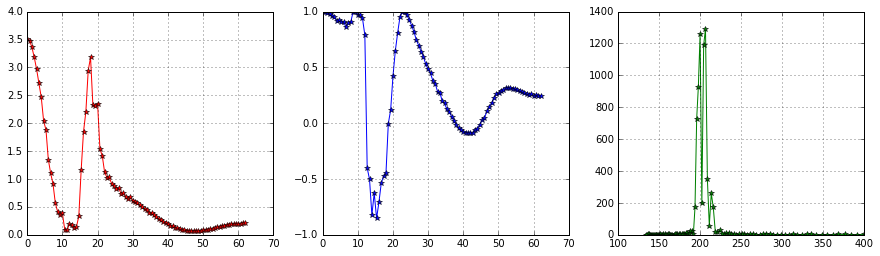

In [214]:
N=nslice
col=-1
n=np.arange(N)*period_s*1e12
a1=amp[:,col]
p1=np.cos(phase[:,col])

#fout=(dindgen(nslice)/(nslice-1.)-0.5)/delt+1.e0/xlamds
#data_profile[2,*]=1/fout*1e9

X=spectrum[:,col]
F=1.0*np.arange(-N/2,N/2,)/N/lam_s+1./lam_s
F=1./F*1e6

fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].plot(n,a1,'r*-')
axes[1].plot(n,p1,'b*-')
axes[2].plot(F,X,'g*-')
#axes[2].axis([800,900,0,4.2e9])
axes[0].grid()
axes[1].grid()
axes[2].grid()